<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


In [9]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df["ConvertedComp"]

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0, 0.5, 'Number of Responders')

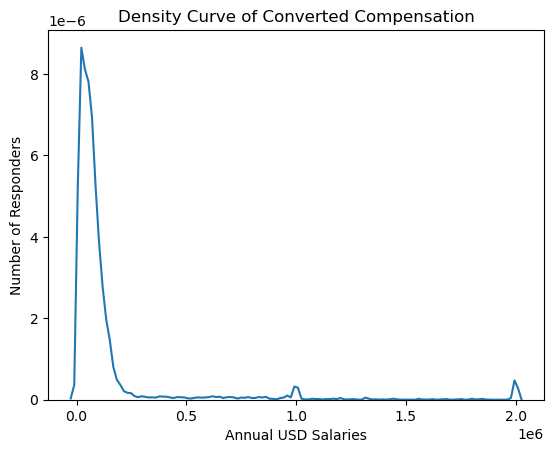

In [18]:
# your code goes herep

sns.distplot(df.ConvertedComp, hist=False, kde=True)

plt.title("Density Curve of Converted Compensation")
plt.xlabel("Annual USD Salaries")
plt.ylabel("Number of Responders")




Plot the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'Respondents')

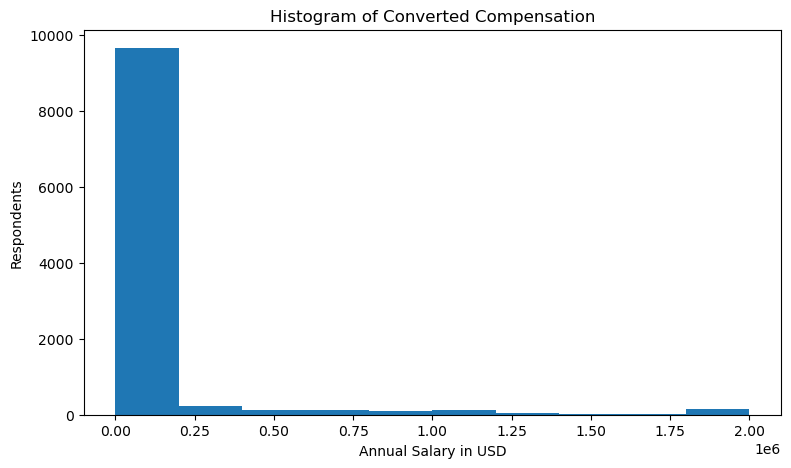

In [29]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(9, 5))
plt.title("Histogram of Converted Compensation")
plt.xlabel("Annual Salary in USD")
plt.ylabel("Respondents")

What is the median of the column `ConvertedComp`?


In [37]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [39]:
# your code goes here
man_count = df.loc[df['Gender'] == 'Man', 'Gender'].count()
print(man_count)

9725


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [42]:
women_df = df[df['Gender']=='Woman']

# Select the ConvertedComp column from the filtered DataFrame
converted_comp = women_df['ConvertedComp']

# Compute the median of the selected column
median_woman = converted_comp.median()
print(median_woman)

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [48]:
# your code goes here
df["Age"].describe()[["min","25%","50%","75%","max"]]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0, 0.5, 'Number of Respondents')

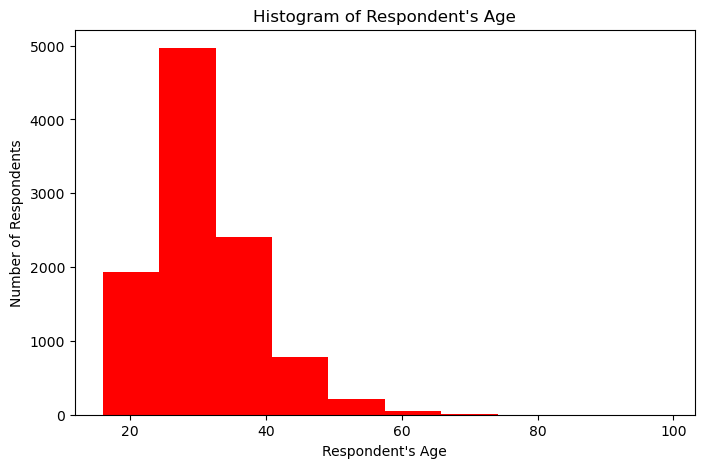

In [54]:
# your code goes here
df["Age"].plot(kind="hist", figsize=(8,5), color="Red")
plt.title("Histogram of Respondent's Age")
plt.xlabel("Respondent's Age")
plt.ylabel("Number of Respondents")

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


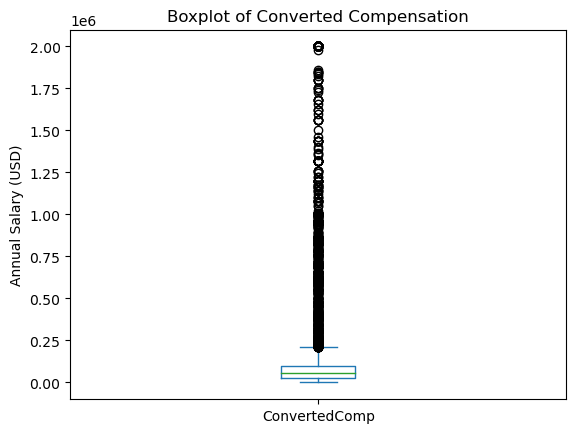

In [61]:
# your code goes here
df["ConvertedComp"].plot(kind="box")

# set the title and labels for the plot
plt.title('Boxplot of Converted Compensation')
plt.ylabel('Annual Salary (USD)')

# show the plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [62]:
# your code goes here
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3-Q1
print(IQR)


73132.0


Find out the upper and lower bounds.


In [65]:
# your code goes here
Upper = Q3 + (1.5 * IQR)
Lower = Q1 - (1.5 * IQR)
print("Upper bound:",Upper, "Lower Bound:",Lower)


Upper bound: 209698.0 Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [69]:
# your code goes here
outliers = df[((df["ConvertedComp"]<(Lower)) | (df["ConvertedComp"]>(Upper)))]
num_outliers =len(outliers)
print(num_outliers)

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [71]:
# your code goes here
df_remove= df[(df["ConvertedComp"] >= Lower) & (df["ConvertedComp"] <= Upper)]
df_remove.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


Text(0.5, 1.0, 'Correlation Heatmap - Age vs. Other Numeric Columns')

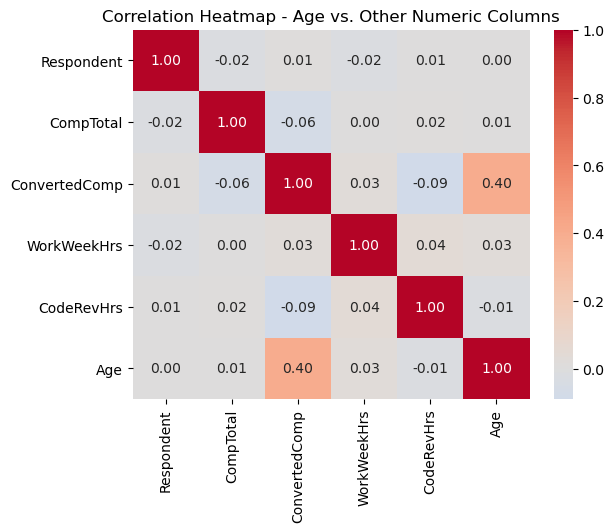

In [80]:
# your code goes here
corr=df_remove.corr()
sns.heatmap(corr, cmap="coolwarm",annot=True, fmt=".2f", center= 0)
plt.title("Correlation Heatmap - Age vs. Other Numeric Columns")


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
